<a href="https://colab.research.google.com/github/arthurt1/Avalia-o-de-Modelos-de-ML/blob/ryan/Avalia%C3%A7%C3%A3o_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nomes da Equipe:



*   Arthur Thomé Costa - 565756
*   Rodrigo Sousa Barbosa - 566581
*   Ryan dos Santos Oliveira - 565120




# Objetivos:
*   Aplicar diferentes métricas de avaliação para classificação, regressão e clusterização
*  Comparar o desempenho de múltiplos algoritmos
* Interpretar corretamente os resultados das métricas
* Identificar problemas como overfitting e underfitting

# Pequeno resumo do trabalho e resultados:

Preparação do Ambiente Virtual:

In [7]:
## Importação das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import load_iris, load_wine, fetch_openml
from sklearn.cluster import KMeans

# Parte 1: CLASSIFICAÇÃO


---


Dataset: *Iris Dataset*

Descrição: Classificação de espécies de flores Iris (Setosa, Versicolor, Virginica) baseado em medidas das sépalas e pétalas.

## Tarefa 1.1: Implementação e Avaliação Básica

Implemente o classificador K-Nearest Neighbors (KNN) com k=3 e k=5

### a) Divida o dataset em 70% treino e 30% teste. Para cada modelo, calcule:

- Acurácia
- Precisão (macro e micro)
- Recall (macro e micro)
- F1-score (macro e micro)
- Matriz de confusão

In [ ]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

### b) Qual modelo obteve melhor desempenho geral? Justifique sua resposta considerando múltiplas métricas.

In [ ]:
nao sei

### C) Existe alguma classe que é mais difícil de classificar? Como você identificou isso?

## Tarefa 1.2: Validação Cruzada

### a)Implemente validação cruzada k-fold com k=5 para todos os modelos da Tarefa 1.1.

### b)Compare os resultados da validação cruzada com a divisão simples treino/teste. O que você observa?

### c) Calcule o desvio padrão da acurácia para cada modelo. O que isso indica sobre a estabilidade do modelo?

## Tarefa 1.3: Curvas ROC e AUC

### a) Para o problema binário (Setosa vs. Não-Setosa), plote as curvas ROC para os três modelos.

### b) Calcule a área sob a curva (AUC) para cada modelo.

### c) Interprete os resultados: qual modelo tem melhor capacidade de discriminação?

# Parte 2: REGRESSÃO

---

Dataset: *Boston Housing (ou California Housing)*

Descrição: Predição de preços de imóveis baseado em características socioeconômicas e geográficas.

## Tarefa 2.1: Múltiplos Modelos de Regressão

Implemente o modelo. K-Nearest Neighbors Regressor (k=3 e k=7)

### a) Divida o dataset em 70% treino e 30% teste. Para cada modelo, calcule:

- Erro Médio Absoluto (MAE)
- Erro Quadrático Médio (MSE)
- Raiz do Erro Quadrático Médio (RMSE)
- Coeficiente de Determinação (R²)
- Erro Percentual Absoluto Médio (MAPE)

### b) Crie um gráfico de dispersão comparando valores preditos vs. valores reais para cada modelo.

### c) Qual modelo apresentou melhor desempenho? Por quê?

## Tarefa 2.2: Análise de Resíduos

### a) Para os três melhores modelos, plote o gráfico de resíduos (erro vs. valores preditos).

### b) Há algum padrão nos resíduos? O que isso indica sobre o modelo?

### c) Calcule e plote o histograma dos resíduos. Eles seguem uma distribuição aproximadamente normal?

# Parte 3: CLUSTERIZAÇÃO


---


Dataset: *Wine Dataset*

Descrição: Análise química de vinhos de três cultivares diferentes na Itália.

## Tarefa 3.1: K-Means

### a) Aplique o algoritmo K-Means com k variando de 2 a 10.

### b) Para cada valor de k, calcule:

- Inércia (within-cluster sum of squares)
- Silhouette Score
- Davies-Bouldin Index
- Calinski-Harabasz Index

In [26]:
wine = load_wine()
X = wine.data

## Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## K-Means variando k de 2 a 10
resultados = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)
    ch_index = calinski_harabasz_score(X_scaled, labels)

    resultados.append([k, inertia, silhouette, db_index, ch_index])

## mostrar resultados em tabela
df_results = pd.DataFrame(
    resultados,
    columns=[
        "k",
        "Inércia (WSS)",
        "Silhouette Score",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index"
    ]
)

print(df_results.to_markdown(index=False))


|   k |   Inércia (WSS) |   Silhouette Score |   Davies-Bouldin Index |   Calinski-Harabasz Index |
|----:|----------------:|-------------------:|-----------------------:|--------------------------:|
|   2 |        1661.68  |           0.265033 |                1.49438 |                   69.0923 |
|   3 |        1277.93  |           0.284859 |                1.38919 |                   70.94   |
|   4 |        1211.75  |           0.254228 |                1.69542 |                   52.7585 |
|   5 |        1123.16  |           0.183621 |                1.91203 |                   45.8565 |
|   6 |        1079.54  |           0.168992 |                1.93096 |                   39.3367 |
|   7 |        1014.43  |           0.172602 |                1.70175 |                   36.5108 |
|   8 |         982.655 |           0.162504 |                1.84373 |                   32.9034 |
|   9 |         927.956 |           0.173874 |                1.64338 |                   31.5534 |


### c) Plote o Método do Cotovelo (Elbow Method) usando a inércia.

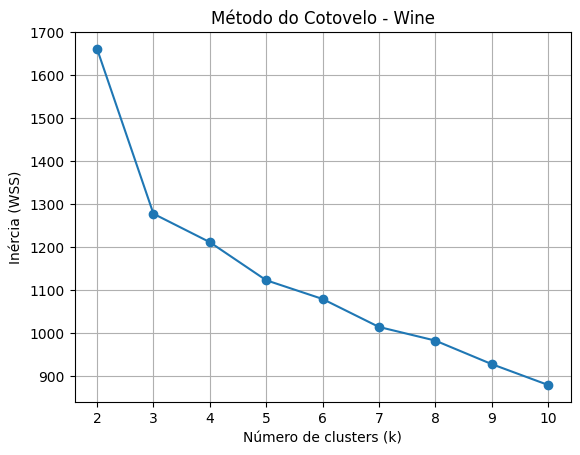

In [27]:
plt.plot(df_results["k"], df_results["Inércia (WSS)"], marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia (WSS)")
plt.title("Método do Cotovelo - Wine")
plt.grid(True)
plt.show()

### d) Determine o número ótimo de clusters considerando múltiplas métricas.

## Tarefa 3.2: Comparação de Algoritmos
Implemente e compare:

1. K-Means (com k ótimo da Tarefa 3.1)

2. DBSCAN (teste diferentes valores de eps e min_samples)

3. Hierarchical Clustering (Agglomerative)

### a) Calcule o Silhouette Score para cada algoritmo.

### b) Como os labels verdadeiros (cultivares) se comparam com os clusters encontrados?

## Tarefa 3.3: Análise de Perfis dos Clusters

### a) Para a melhor solução de clusterização, calcule:

- Média de cada feature por cluster
- Desvio padrão de cada feature por cluster

### b) Crie um gráfico de radar (spider chart) mostrando o perfil médio de cada cluster.

### c) Descreva as características de cada cluster em termos das features originais.